In [14]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pandas scipy


  Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl (28.8 MB)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amazon.csv')


In [4]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [6]:
print(df['category'])

0       Computers&Accessories|Accessories&Peripherals|...
1       Computers&Accessories|Accessories&Peripherals|...
2       Computers&Accessories|Accessories&Peripherals|...
3       Computers&Accessories|Accessories&Peripherals|...
4       Computers&Accessories|Accessories&Peripherals|...
                              ...                        
1460    Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462    Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
1463    Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...
1464    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, Length: 1465, dtype: object


In [63]:
# split category column into multiple columns on '|' delimiter.
catsplit = df['category'].str.split('|', expand=True)


# copy selected columns to a new dataframe df1.
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3', 3:'category_4', 4:'category_5'})


# rename and assign split categories to df1 as category_1, category_2 etc.
df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']
df1['category_3'] = catsplit['category_3']
df1['category_4'] = catsplit['category_4']

# drop original category column from df1.
df1.drop(columns='category', inplace=True)
df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,category_3,category_4
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64.0,4.2,"24,269",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹199,₹349,43.0,4.0,"43,994",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,₹199,"₹1,899",90.0,3.9,"7,928",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,₹329,₹699,53.0,4.2,"94,363",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,₹154,₹399,61.0,4.2,"16,905",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,₹379,₹919,59.0,4,"1,090",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"₹2,280","₹3,045",25.0,4.1,"4,118",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"₹2,219","₹3,080",28.0,3.6,468,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"₹1,399","₹1,890",26.0,4,"8,031",Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans


In [114]:
print(df1['category_1'].value_counts())
print("-----------------------------------")
print(df1['category_2'].value_counts())

Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: category_1, dtype: int64
-----------------------------------
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories   

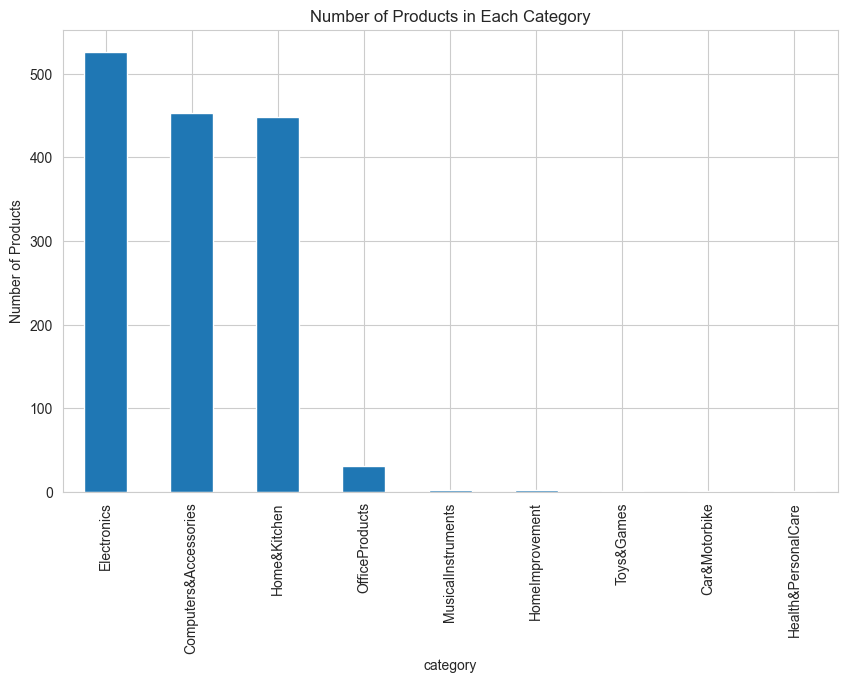

In [139]:
import matplotlib.pyplot as plt

# Count the number of products in each category
category_counts = df1['category_1'].value_counts()

# Create the histogram
category_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Products in Each Category')
plt.xlabel('category')
plt.ylabel('Number of Products')

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

plt.show()

In [149]:
df['discount_percentage'].dtype

dtype('float64')

In [155]:
average_discount_percentage = df['discount_percentage'].mean()

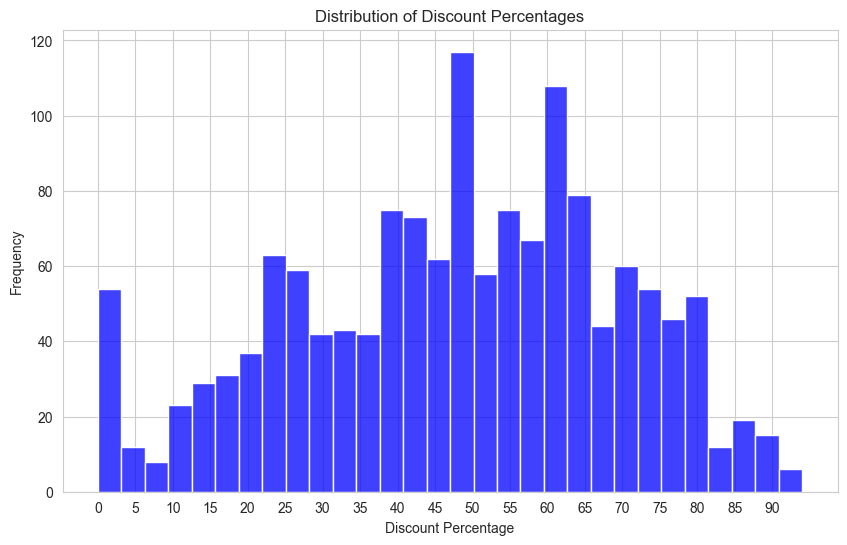

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram for the discount_percentage column
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], kde=False, bins=30, color='blue')

plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.xticks(range(0, int(df['discount_percentage'].max())+1, 5))

plt.show()
